In [1]:
from stable_baselines3.common.env_checker import check_env
from stable_baselines3 import PPO
from stable_baselines3.common.callbacks import BaseCallback
from stable_baselines3.common.callbacks import CallbackList, CheckpointCallback, EvalCallback

import os.path
import numpy as np
import pandas as pd
from tensorboardX import SummaryWriter

from lib_for_dqn import lifecycle

N_STEPS = 3_000_000

env = lifecycle.LifecycleEnv()
check_env(env)
model = PPO("MlpPolicy", env, seed = 0, 
            # learning_rate = 0.0000001,
            tensorboard_log="./runs/")

c:\Users\astragio\rep\Anaconda3\lib\site-packages\gym\spaces\box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(


In [2]:
class TensorboardCallback(BaseCallback):

    def __init__(self, verbose=0):
        super(TensorboardCallback, self).__init__(verbose)

    def _on_step(self) -> bool:
        # Log scalar value (here a random variable)
        value = np.random.random()
        self.logger.record('random_value', value)
        return True

In [3]:
# if os.path.isfile("C:\\Users\\AS\\rep\\ucl_final_project\\reinforcement\\life.zip"):
#     model = PPO.load("life", env=env)

eval_env = lifecycle.LifecycleEnv()
eval_callback = EvalCallback(eval_env, best_model_save_path='./logs/best_model', log_path='./logs/results', eval_freq=(N_STEPS/10))

model.learn(total_timesteps=N_STEPS, callback=eval_callback)
# model.save("life")

c:\Users\astragio\rep\Anaconda3\lib\site-packages\stable_baselines3\common\evaluation.py:65: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=1000000, episode_reward=-670.42 +/- 0.00
Episode length: 81.00 +/- 0.00
New best mean reward!
Eval num_timesteps=2000000, episode_reward=-662.92 +/- 0.00
Episode length: 81.00 +/- 0.00
New best mean reward!
Eval num_timesteps=3000000, episode_reward=38.14 +/- 0.00
Episode length: 81.00 +/- 0.00
New best mean reward!
Eval num_timesteps=4000000, episode_reward=-800.00 +/- 0.00
Episode length: 81.00 +/- 0.00
Eval num_timesteps=5000000, episode_reward=-800.00 +/- 0.00
Episode length: 81.00 +/- 0.00
Eval num_timesteps=6000000, episode_reward=-800.00 +/- 0.00
Episode length: 81.00 +/- 0.00
Eval num_timesteps=7000000, episode_reward=-800.00 +/- 0.00
Episode length: 81.00 +/- 0.00
Eval num_timesteps=8000000, episode_reward=-800.00 +/- 0.00
Episode length: 81.00 +/- 0.00
Eval num_timesteps=9000000, episode_reward=-800.00 +/- 0.00
Episode length: 81.00 +/- 0.00
Eval num_timesteps=10000000, episode_reward=-800.00 +/- 0.00
Episode length: 81.00 +/- 0.00


In [4]:
# watch trained agent
state = env.reset()
done = False
rewards = 0
num_steps = env.terminal_age - env.starting_age + 1
info_df = pd.DataFrame(
    columns=("age", "wealth", "consumption", 
    "equity_allocation", "port_return", "reward"))

for step in range(num_steps):
    action, _states = model.predict(state, deterministic=True)
    state, reward, done, info = env.step(action)
    info_df.loc[len(info_df.index)] = info
    rewards += reward
print(rewards)

-800.0


In [5]:
model.predict(np.array([60, 1.0], dtype=np.float32), 
    deterministic=True)

(array([ 1., -1.], dtype=float32), None)

In [6]:
env.reset()

array([20.,  1.], dtype=float32)

In [7]:
info_df

,age,wealth,consumption,equity_allocation,port_return,reward
0,20,2.050000,0.0,1.0,0.05,-10.0
1,21,3.152500,0.0,1.0,0.05,-10.0
2,22,4.310125,0.0,1.0,0.05,-10.0
3,23,5.525631,0.0,1.0,0.05,-10.0
4,24,6.801913,0.0,1.0,0.05,-10.0
...,...,...,...,...,...,...
76,96,803.774931,0.0,1.0,0.05,-10.0
77,97,843.963678,0.0,1.0,0.05,-10.0
78,98,886.161862,0.0,1.0,0.05,-10.0
79,99,930.469955,0.0,1.0,0.05,-10.0


Text(0.5, 1.0, 'Reward')

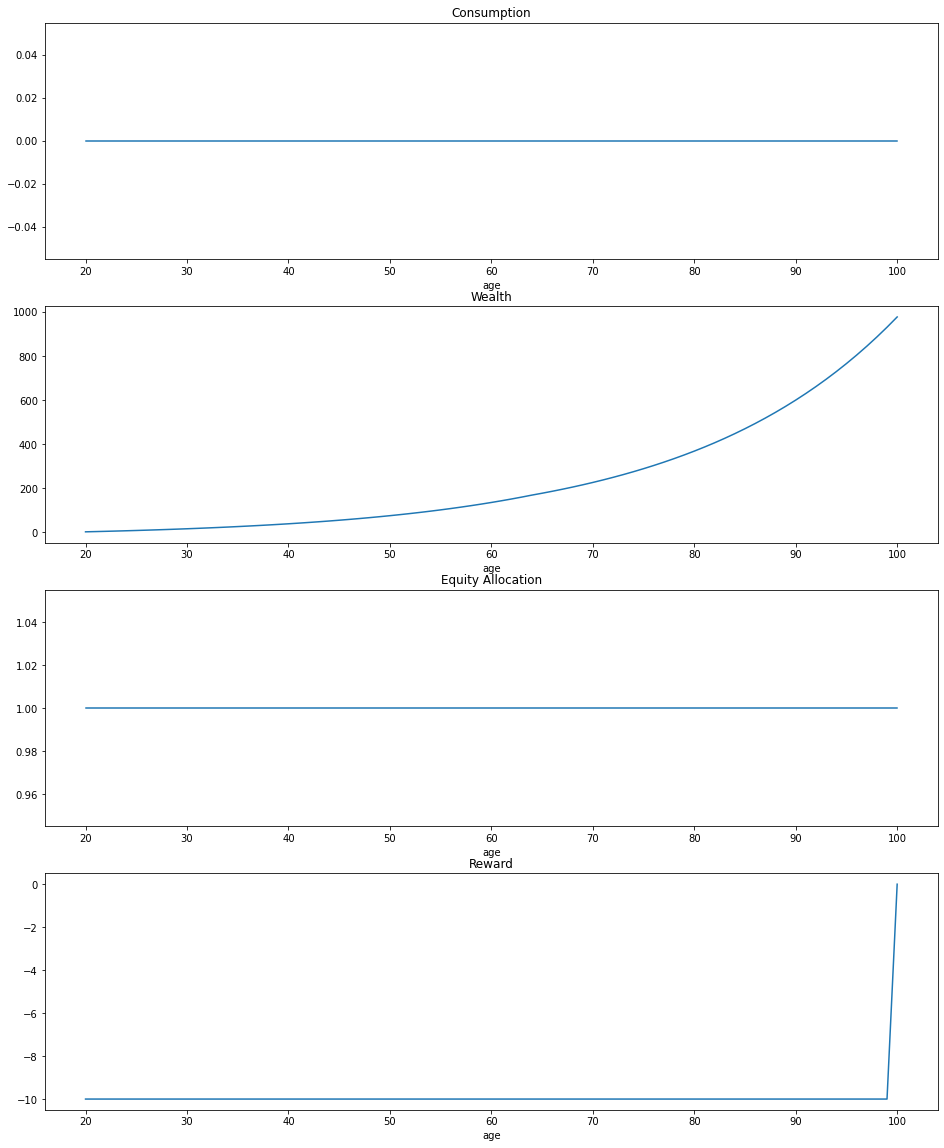

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows = 4, figsize=(16, 20))
info_df.set_index("age").consumption.rename("consumption").plot(ax = ax[0])
ax[0].set_title("Consumption")
info_df.set_index("age").wealth.plot(ax = ax[1])
ax[1].set_title("Wealth")
info_df.set_index("age").equity_allocation.plot(ax = ax[2])
ax[2].set_title("Equity Allocation")
info_df.set_index("age").reward.plot(ax = ax[3])
ax[3].set_title("Reward")